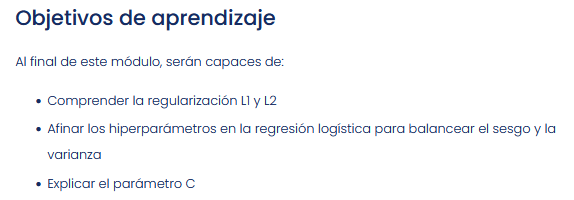

# Proposito de la regularizacion L1 y L2

La regularizacion tendera a reducir el sobreajuste en un modelo. Tendera a reducir el rendimiento del modelo en el conjunto de entrenamiento. Pero finalmente mejorara el rendimiento en conjuntos de pruebas.

Una forma de pensar sobre la regularizacion es como una herramienta para introducir informacion adicional (sesgo) para penalizar valores extremos de parametros (peso). Existen dos tipos comunes de regularizacion que trataremos en este curso. 

L1 y L2. Ambos introducen un termino de penalizacion a las ponderaciones (coeficientes) que el modelo usa para hacer predicciones. Mas grandes las ponderaciones, mas grande es la penalizacion. Si el rendimiento del modelo es su principal preocupacion, es mejor intentar ambos.

**Cuando usar L1?**

La regulacion L1 introduce una penalizacion que empujara algunas o varias ponderaciones a cero. Reducir la ponderacion de caracteristica a cero es util en casos donde se tiene un numero grande de caracteristicas.

**Cuando usar L2?**

L2 puede funcionar particularmente bien si hay un alto grado de multicolinealidad en el modelo (alta correlacion entre las caracteristicas) filtrando el ruido de los datos y previniendo el sobreajuste( L1 tambien puede ayudar en el sobreajuste)


##**Como se relaciona esto con scikit-learn?**

El parametro C en la regresion logistica es el inverso de alfa. (Veran donde se usa el alfa en la seccion de matematica abajo) Por lo tanto, al disminuir el valor de C, aumenta la fuerza de regularizacion. En resumen, C =1 /alfa. Tengan en cuenta que se trata de una convencion que puede resultar bastante confusa al principio.

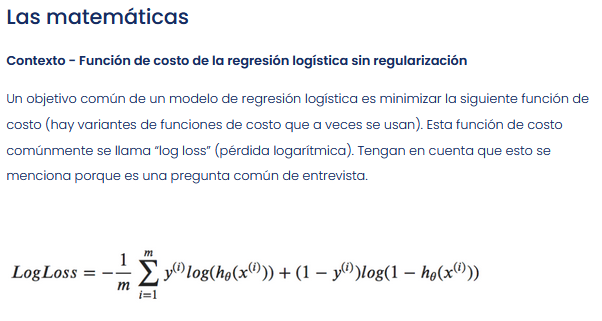

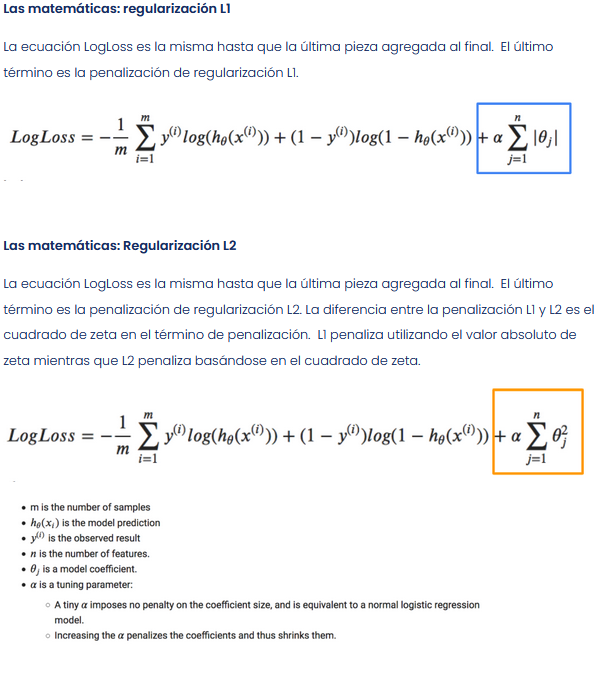

# Ejemplo practico

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

In [1]:
from google.colab import drive
drive.mount ("/content/drive")

Mounted at /content/drive


In [4]:
df = pd.read_csv("/content/drive/MyDrive/Data CodingDojo/cancer.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


**Convertir el objetivo a valores numericos**

In [14]:
df['diagnosis'] = df['diagnosis'].replace({'B':0, 'M':1})

In [15]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


**Regresion logistica**

El codigo de abajo muestra un modelo de regresion logistica por defecto. El modelo por defecto utiliza solver = "lbfgs" con regularizacion L2 y un valor C de 1,0.

In [17]:
X = df.drop(columns=['diagnosis', 'id'])
y = df['diagnosis']
 
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
# Make an instance of the model with default parameters
logreg = LogisticRegression()
# Instantiate Standard Scaler because scaling is required for logistic regression
scaler = StandardScaler()
# Put scaler and model in a pipeline
logreg_pipe = make_pipeline(scaler, logreg)
# Training the model on the data, storing the information learned from the data
# Model is learning the relationship between X and y 
logreg_pipe.fit(X_train, y_train)
print("Training Score:",logreg_pipe.score(X_train, y_train))
print("Test Score:", logreg_pipe.score(X_test, y_test))



Training Score: 0.9859154929577465
Test Score: 0.9790209790209791


Aquellos resultados son bastante buenos, pero veamos si podemos mejorar la puntuacion de prueba al cambiar el valor de C.

Generalmente cuando cambiamos los valroes de C, los cambiamos por orden de magnitud. La diferencia entre 0,1 y 0,2 no sera de mucho, pero la diferencia entre 0,1 y 1 -o- 1 y 10 sera mayor.

**Afinacion de L1:**

Primero, intentenmos la regularizacion de L1. El solver por defecto no hara la regularizacion L1, por lo que necesitamos cambiar el solver en el modelo de regresion logistica. Utilizaremos el solver = "liblinear". Para mas inforamcion sobre los hiperparametros de regresion logistica revisen. [documentacion sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

{0.0001: 0.6223776223776224,
 0.001: 0.6223776223776224,
 0.01: 0.951048951048951,
 0.1: 0.972027972027972,
 1: 0.972027972027972,
 10: 0.9440559440559441,
 100: 0.9370629370629371,
 1000: 0.9370629370629371}

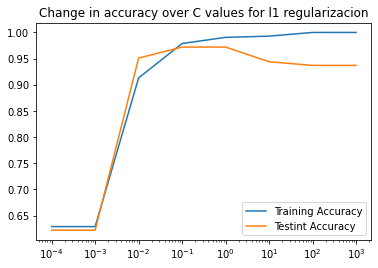

In [18]:
#Create a list of C values and empty lists for scores
c_values = [0.0001,0.001,0.01,0.1,1,10,100,1000]
train_scores = []
test_scores = []
#iteracion sobre los valores de c

for c in c_values:
  #instanciar modelo con cada valor de c y ajustarlo a la data.
  log_reg = LogisticRegression(C=c, max_iter=1000, solver="liblinear", penalty="l1")
  log_reg_pipe = make_pipeline(scaler, log_reg)
  log_reg_pipe.fit(X_train, y_train)
  # add the training and testint scores to our scores lists
  train_scores.append(log_reg_pipe.score(X_train, y_train))
  test_scores.append(log_reg_pipe.score(X_test, y_test))


#plot the change in accuracy as we change the value of C
fig, ax = plt.subplots(1,1)
ax.plot(c_values, train_scores, label="Training Accuracy")
ax.plot(c_values, test_scores, label="Testint Accuracy")
ax.set_xticks(c_values)
ax.set_title("Change in accuracy over C values for l1 regularizacion")
ax.legend()

#Set the x axis to a logarithmic scale to show the values of C in even intervals
ax.set_xscale("log")
#print a dictionary of values of C and accuracy scores
{c: score for c, score in zip(c_values, test_scores)}

Recuerden que nuestro objetivo final es mejorar la exactitud en el conjunto de prueba.

Segun este grafico, obtenemos la mejor exactitud cuando C=0,1 (10^-1) Observen que a medida que se aumenta el valor de C, la puntuacion en los datos de entrenamiento continua incrementando. Este se debe porque menos regularizacion tiende a reducir el sesgo. Sin embargo, despues de cierto punto, menos regularizacion (Mayor valor C) reduce la exactitud en los datos de prueba a medida que el modelo se sobreajusta demasiado. Mas regularizacion (un valor C mas pequeno) tiende a reducir la varianza mientras disminuye el sesgo.

**Afinacion de L2**

Cambiaremos el codigo levemente para usar la regularizacion L2.


{0.0001: 0.951048951048951,
 0.001: 0.951048951048951,
 0.01: 0.9790209790209791,
 0.1: 0.993006993006993,
 1: 0.9790209790209791,
 10: 0.972027972027972,
 100: 0.951048951048951,
 1000: 0.9370629370629371}

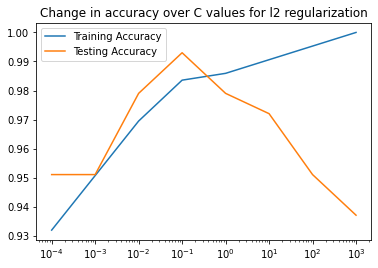

In [19]:
# create a list of c values and empty lists for scores
c_values = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
train_scores = []
test_scores = []
#iterative over the c values
for c in c_values:
  # instantiate a model with each value of c and fit it on the data
  log_reg = LogisticRegression(C=c, max_iter=1000, solver='liblinear', penalty='l2')
  log_reg_pipe = make_pipeline(scaler, log_reg)
  log_reg_pipe.fit(X_train, y_train)
 
  # add the training and testing scores to our scores lists
  train_scores.append(log_reg_pipe.score(X_train, y_train))
  test_scores.append(log_reg_pipe.score(X_test, y_test))
  
#plot the change in accuracy as we change the value of C
fig, ax = plt.subplots(1,1)
ax.plot(c_values, train_scores, label='Training Accuracy')
ax.plot(c_values, test_scores, label='Testing Accuracy')
ax.set_xticks(c_values)
ax.set_title('Change in accuracy over C values for l2 regularization')
ax.legend()
#set the x axis to a logarithmic scale to show the values of C in even intervals
ax.set_xscale('log')
# print a dictionary of values of C and accuracy scores
{c:score for c, score in zip(c_values, test_scores)}


Con la regularización L2 conseguimos nuestra mejor puntuación en C=0,1, y las puntuaciones de prueba caen mucho más drásticamente a medida que C aumenta. 

Con una exactitud de 99,3 %, nuestro mejor conjunto de hiperparámetro para nuestro modelo de regresión logística es solver=’liblinear’, penalty=’l2’ y C=0,1.  Si observamos nuestras correlaciones de característica, tiene sentido que L2 será la mejor opción debido a que numerosas características se correlacionan.  El mapa de calor de abajo muestra las características altamente correlacionadas como cuadros muy claros u oscuros en las intersecciones de las filas y columnas de esas características.  Observamos numerosos cuadros claros y oscuros.  Como sabemos, la regularización L2 es útil para modelar conjuntos de datos con multicolinealidad o características altamente correlacionadas.

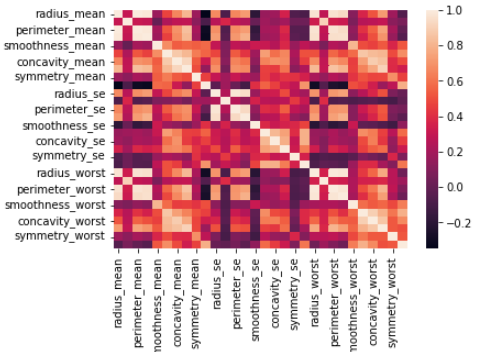

**Resumen**

La regresion logistica puede usar una regularizacion L1 o L2, aunque algunos solver solo pueden usar ciertos tipos. Podemos ajustar la fuerza del termino de la regularizacion al afinar C. los valores mas altos de C son una regularizacion mas debil, y los numeros mas bajos son mas fuertes.

Encontrar la cantidad optima de regularizacion para los modelos para balancear el sesgo y la varianza es un paso importante en el desarrollo del modelo.